In [56]:
import kagglehub
gauravduttakiit_resume_dataset_path = kagglehub.dataset_download('gauravduttakiit/resume-dataset')

print('Data source import complete.')

Using Colab cache for faster access to the 'resume-dataset' dataset.
Data source import complete.


In [57]:
# Import essential libraries
import numpy as np  # For linear algebra operations
import pandas as pd  # For data processing and reading CSV files
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced data visualization
import re  # For regular expressions operations
from nltk.corpus import stopwords  # For removing stopwords from text data
from sklearn.preprocessing import LabelEncoder  # For encoding labels
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization
from sklearn.neighbors import KNeighborsClassifier  # For the KNN classifier
from sklearn.metrics import accuracy_score  # For evaluating model accuracy

import os  # For operating system dependent functionality

# Iterate through the directory to list all files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv


In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
df = pd.read_csv("/UpdatedResumeDataSet.csv")
df.sample(5)

,Category,Resume
596,Python Developer,Technical Skills: Languages Python Python Fram...
334,Java Developer,Technical Skills (Trained / Project Acquired S...
776,Hadoop,Technical Skill Set Big Data Ecosystems: Hadoo...
172,Web Designing,"Technical Skills Web Technologies: Angular JS,..."
750,Hadoop,"Skill Set: Hadoop, Map Reduce, HDFS, Hive, Sqo..."


In [60]:
df.shape

(962, 2)

In [61]:
df["Category"].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


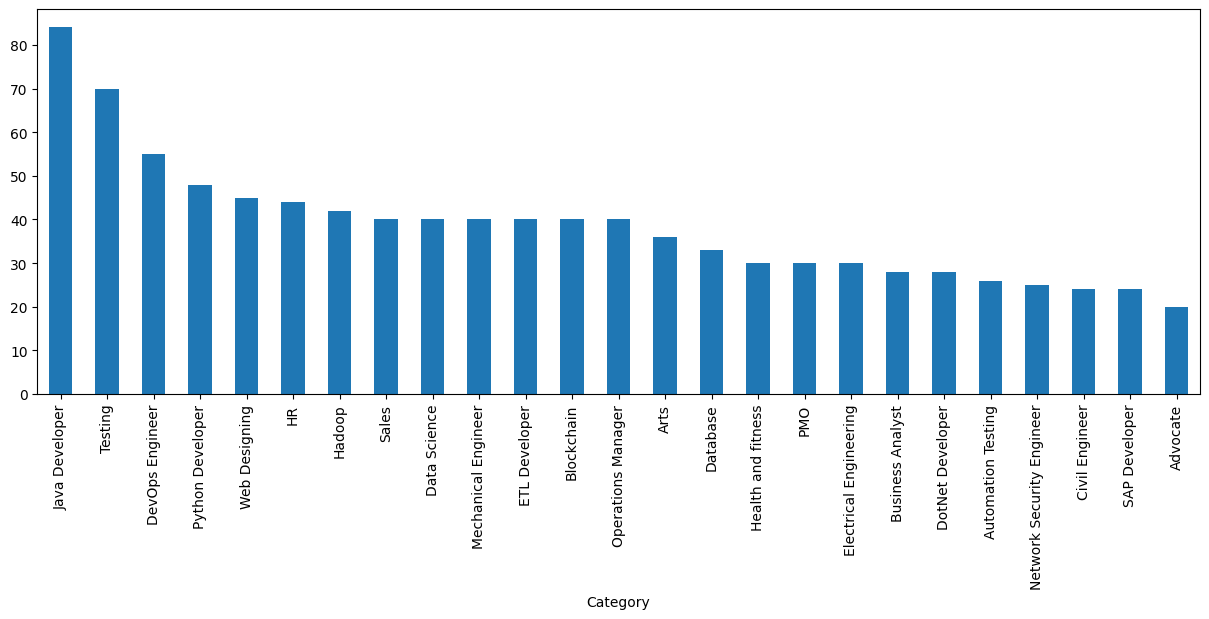

In [62]:
# Set the size of the plot
plt.figure(figsize=(15,5))

# Count the number of resumes in each category and plot a bar chart
df["Category"].value_counts().plot(kind="bar")

# Display the plot
plt.show()

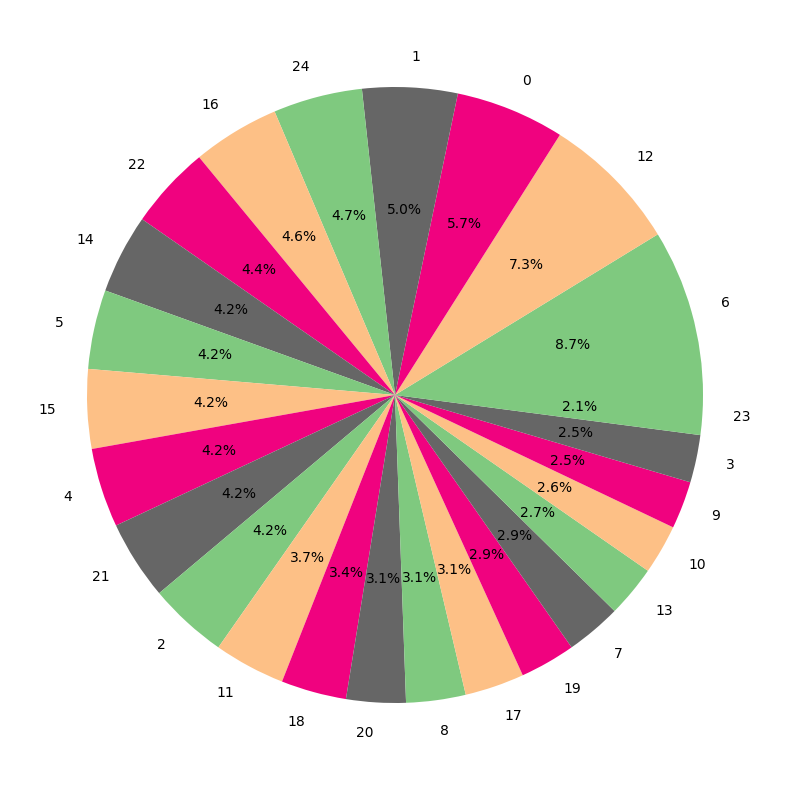

In [84]:
counts = df["Category"].value_counts()
labels = df["Category"].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=plt.cm.Accent(np.linspace(0,1,4)))
plt.show()

In [64]:
def clean(text):

    # Compile patterns for URLs and emails to speed up cleaning process
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')

    # Remove URLs
    clean_text = url_pattern.sub('', text)

    # Remove emails
    clean_text = email_pattern.sub('', clean_text)

    # Remove special characters (keeping only words and whitespace)
    clean_text = re.sub(r'[^\w\s]', '', clean_text)

    # Remove stop words by filtering the split words of the text
    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)

    return clean_text

In [65]:
import nltk
nltk.download('stopwords')
string = "Hello, $ % # I found this # article at https://www.example.com! You can contact me at john@example.com."
print(clean(string))

Hello found article contact


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [67]:
df["Resume"] = df["Resume"].apply(lambda x: clean(x))

In [68]:
df["Resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run ana

In [69]:
# Initialize the Label Encoder
le = LabelEncoder()

# Fit the label encoder on the 'Category' column to learn the unique categories
le.fit(df["Category"])

# Transform the 'Category' column into encoded numerical values
df["Category"] = le.transform(df["Category"])

In [70]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [71]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=2)

# Fit and transform the 'Resume' column into TF-IDF features
resume_tfidf = tfidf.fit_transform(df["Resume"])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    resume_tfidf, df["Category"], test_size=0.2, random_state=42
)

X_train.shape, y_train.shape


((769, 41108), (769,))

In [72]:
df["Category"].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [73]:
X_train.shape, y_train.shape

((769, 41108), (769,))

In [74]:
# Initialize the KNN classifier with default parameters
clf = KNeighborsClassifier()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the categories for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# The accuracy is a float representing the proportion of correct predictions
print(f'Accuracy of the KNN classifier on test set: {accuracy:.2f}')

Accuracy of the KNN classifier on test set: 0.98


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Define a dictionary to hold models
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB()
}


In [76]:
# Dictionary to hold accuracy scores
accuracy_scores = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

    # Print the accuracy
    print(f'Accuracy of {model_name} on test set: {accuracy:.2f}')

# Pick the best model based on accuracy
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]

print("Best model is:", best_model_name, "with accuracy:", accuracy_scores[best_model_name])


Accuracy of KNeighborsClassifier on test set: 0.98
Accuracy of LogisticRegression on test set: 0.99
Accuracy of RandomForestClassifier on test set: 0.98
Accuracy of SVC on test set: 0.99
Accuracy of MultinomialNB on test set: 0.98
Best model is: LogisticRegression with accuracy: 0.9948186528497409


In [77]:
from google.colab import files
import io

# OPTIONAL: install libraries for PDF and DOCX only once in a cell
!pip install PyPDF2 python-docx

import PyPDF2
import docx

In [78]:
def extract_text_from_pdf(file_path):
    text = ""
    with open(file_path, "rb") as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + " "
    return text

def extract_text_from_docx(file_path):
    doc = docx.Document(file_path)
    text = " ".join([para.text for para in doc.paragraphs])
    return text

In [79]:
# ---- Upload your resume ----
print("Upload your resume file (PDF, DOCX, or TXT)...")
uploaded = files.upload()

# Get uploaded file name
file_name = list(uploaded.keys())[0]
print("Uploaded file:", file_name)

# ---- Extract raw text based on file type ----
if file_name.lower().endswith(".pdf"):
    raw_text = extract_text_from_pdf(file_name)
elif file_name.lower().endswith(".docx"):
    raw_text = extract_text_from_docx(file_name)
else:
    # Assume it's a text file (.txt) or similar
    with open(file_name, "r", encoding="utf-8", errors="ignore") as f:
        raw_text = f.read()

print("\n--- RAW TEXT SAMPLE (first 500 chars) ---")
print(raw_text[:500])

# ---- Clean text using the SAME clean() function ----
cleaned_text = clean(raw_text)

# ---- Convert to TF-IDF using the SAME vectorizer ----
resume_vec = tfidf.transform([cleaned_text])

# ---- Predict category using the best model ----
pred_encoded = best_model.predict(resume_vec)[0]
pred_category = le.inverse_transform([pred_encoded])[0]

print("\nPredicted Resume Category:", pred_category)

Upload your resume file (PDF, DOCX, or TXT)...


Saving Mohan Resume.pdf to Mohan Resume (1).pdf
Uploaded file: Mohan Resume (1).pdf

--- RAW TEXT SAMPLE (first 500 chars) ---
WORK EXPERIENCE
INTERN | MY HOME CONSTRUCTIONS PVT. LTD.          HYDERABAD, INDIA | JUNE 2025 – JULY 2025
Successfully completed a 1-month internship focused on planning and execution of high-
rise residential buildings, with exposure to site engineering, project scheduling, and
quality control.
Collaborated with the team on structural and architectural coordination, site supervision,
and real-time project management practices.
Contributed to the development and updating of project plans using 

Predicted Resume Category: Civil Engineer


In [80]:
# ---- Simple TF-IDF based keyword summary ----
feature_names = tfidf.get_feature_names_out()
dense_vec = resume_vec.toarray()[0]

# Get indices of top 15 words
top_n = 15
top_indices = dense_vec.argsort()[::-1][:top_n]
top_words = [feature_names[i] for i in top_indices if dense_vec[i] > 0]

print("\nTop keywords detected in your resume:")
print(", ".join(top_words))



Top keywords detected in your resume:
construction, site, structural, cost, residential, drafting, kr, civil, hyderabad, completed, cgpa, project management, motivated, project, intern
